In [1]:
import melanoma as mel
import pathlib

%matplotlib inline
# %matplotlib widget
%load_ext autoreload
%autoreload -p 2

2023-11-10 12:23:22.091890: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
default_path = pathlib.Path.cwd()
utilInstance = mel.Util(default_path)
dbtype = mel.DatasetType.HAM10000


In [ ]:
utilInstance.generateAvgImages(dbtype)

In [10]:
data_gen_X_train, data_gen_X_val, X_train, X_test, X_val, y_train, y_test, y_val, num_classes = utilInstance.loadCSV(dbtype)
cnn = mel.CNN(64, 64, None, num_classes)
model, history = cnn.train(data_gen_X_train, data_gen_X_val, X_train, y_train, X_val, y_val)




Reloading 'melanoma.cnn'.


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel12279,pixel12280,pixel12281,pixel12282,pixel12283,pixel12284,pixel12285,pixel12286,pixel12287,label
0,191,152,194,191,153,195,192,149,192,194,...,185,154,180,186,156,184,182,152,173,5
1,24,13,23,24,14,28,37,24,46,61,...,26,15,29,27,15,28,24,13,25,5
2,185,129,140,192,136,151,198,142,156,198,...,152,120,138,144,113,123,115,81,84,5
3,24,11,19,36,19,30,64,38,50,91,...,27,13,16,25,12,16,24,9,14,5
4,138,94,117,158,113,138,178,133,161,191,...,140,106,118,108,77,92,67,40,55,5


((# of images, w*h*c), (# of labels,))
(10015, 12288) (10015,)
In the case of test_size=0.1 -> 90% training imgs, 10% test imgs, 90% training labels, 10% test labels
(9013, 12288) (1002, 12288) (9013,) (1002,)
Split training images into 80:20 train/val sets
# of training images, # of validation images, # of training labels, # of validation labels
(7210, 12288) (1803, 12288) (7210,) (1803,)
Reshape images into # images, h, w, ch
(7210, 64, 64, 3) (1803, 64, 64, 3) (1002, 64, 64, 3)
Again, reshape labels too
Reshaped labels shape
(7210, 7) (1803, 7) (1002, 7)


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
112/112 [==============================] - 7s 58ms/step - loss: 0.9891 - accuracy: 0.6639 - val_loss: 0.8853 - val_accuracy: 0.6828
Epoch 2/30
112/112 [==============================] - 6s 57ms/step - loss: 0.8575 - accuracy: 0.6854 - val_loss: 0.8529 - val_accuracy: 0.7171
Epoch 3/30
112/112 [==============================] - 6s 56ms/step - loss: 0.7943 - accuracy: 0.7070 - val_loss: 0.7715 - val_accuracy: 0.7094
Epoch 4/30
112/112 [==============================] - 7s 59ms/step - loss: 0.7588 - accuracy: 0.7242 - val_loss: 0.7384 - val_accuracy: 0.7243
Epoch 5/30
112/112 [==============================] - 6s 57ms/step - loss: 0.7284 - accuracy: 0.7319 - val_loss: 0.7018 - val_accuracy: 0.7410
Epoch 6/30
112/112 [==============================] - 6s 56ms/step - loss: 0.7116 - accuracy: 0.7387 - val_loss: 0.7907 - val_accuracy: 0.7038
Epoch 7/30
112/112 [==============================] - 6s 56ms/step - loss: 0.6944 - accuracy: 0.7420 - val_loss: 0.7075 - val_accuracy: 0.7338

57/57 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.7682
Validation: accuracy = 0.768164  ;  loss_v = 0.632677
Test: accuracy = 0.762475  ;  loss = 0.670897


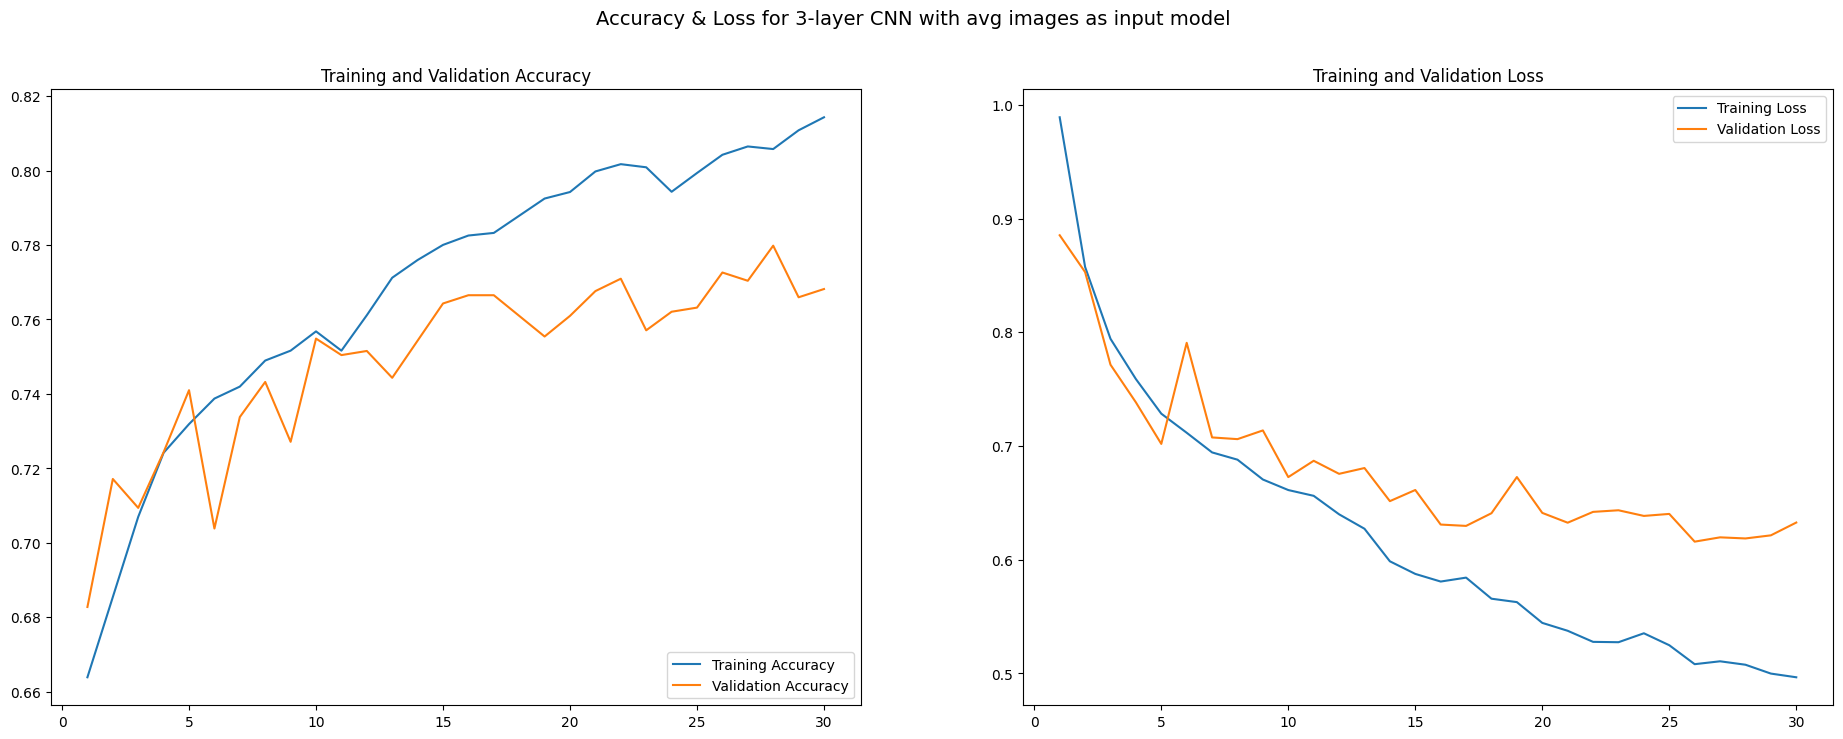

In [11]:
loss_test, acc_test = model.evaluate(X_test, y_test, verbose=1)
loss_val, acc_val = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))
model.save("model.h5")

visualizer.visualize_performance(
    model_name = '3-layer CNN with avg images as input',
    history = history
)